# Mushroom Classification

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# The Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
pd.set_option('display.max_columns',500)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


(0.0, 4500.0)

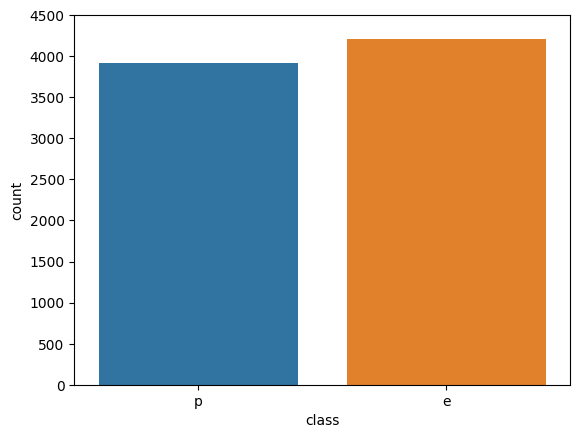

In [4]:
sns.countplot(data=df,x="class",hue="class")
plt.ylim(0,4500)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


# Train Test Split

In [7]:
X = df.drop('class',axis=1)

In [8]:
X = pd.get_dummies(X,drop_first=True)

In [9]:
len(X.columns)

95

In [10]:
y = df['class']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Modeling

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
mod = RandomForestClassifier()

In [16]:
mod.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
predic = mod.predict(X_test)

In [18]:
predic

array(['p', 'e', 'e', ..., 'e', 'e', 'e'], dtype=object)

In [19]:
confusion_matrix(y_test,predic)

array([[646,   0],
       [  0, 573]])

In [20]:
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       646
           p       1.00      1.00      1.00       573

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
mod2 = AdaBoostClassifier()

In [23]:
mod2.fit(X_train,y_train)

AdaBoostClassifier()

In [24]:
predic2 = mod2.predict(X_test)

In [25]:
predic2

array(['p', 'e', 'e', ..., 'e', 'e', 'e'], dtype=object)

In [26]:
confusion_matrix(y_test,predic2)

array([[646,   0],
       [  0, 573]])

In [27]:
print(classification_report(y_test,predic2))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       646
           p       1.00      1.00      1.00       573

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [28]:
from sklearn.metrics import accuracy_score

In [29]:
Rscore = []
for i in [1,5,10,20,30,50]:
    Rmodel = RandomForestClassifier(n_estimators=i)
    Rmodel.fit(X_train,y_train)
    pre = Rmodel.predict(X_test)
    Rscore.append(accuracy_score(y_test,pre))

In [30]:
Rscore

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [31]:
Ascore = []
for i in [1,5,10,20,30,50]:
    Amodel = AdaBoostClassifier(n_estimators=i)
    Amodel.fit(X_train,y_train)
    Pre = Amodel.predict(X_test)
    Ascore.append(accuracy_score(y_test,Pre))

In [32]:
Ascore

[0.874487284659557, 0.9606234618539786, 0.9917965545529123, 1.0, 1.0, 1.0]

In [33]:
dtf = pd.DataFrame({'Models':["RF","RF","RF","RF","RF","RF","AB","AB","AB","AB","AB","AB"],"No. of estimators":[1,5,10,20,30,50,1,5,10,20,30,50],"Accuracy":[1.0, 1.0, 1.0, 1.0, 1.0, 1.0,0.8876127973748975, 0.9524200164068909, 0.9893355209187858, 1.0, 1.0, 1.0]})

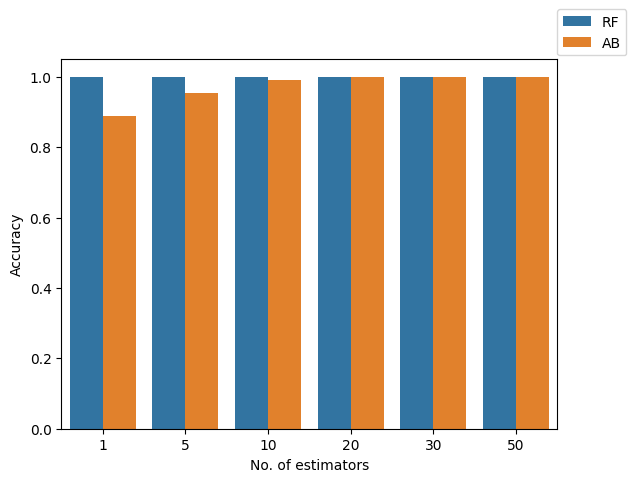

In [34]:
sns.barplot(data=dtf,x='No. of estimators',y='Accuracy',hue='Models')
plt.legend(loc=(1,1.01))

In [35]:
Rscore = []
for i in range(1,10):
    Rmodel = RandomForestClassifier(max_depth=i)
    Rmodel.fit(X_train,y_train)
    pre = Rmodel.predict(X_test)
    Rscore.append(accuracy_score(y_test,pre))

In [36]:
Rscore

[0.9269893355209188,
 0.9417555373256767,
 0.9860541427399507,
 0.992616899097621,
 0.992616899097621,
 0.9958982772764561,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'Accuracy')

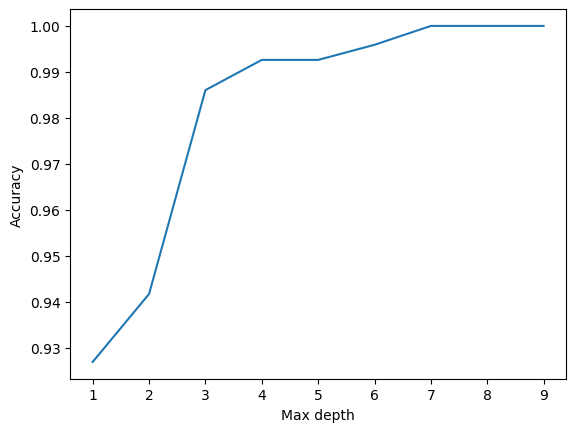

In [37]:
sns.lineplot(x=range(1,10),y=Rscore)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [39]:
Ascore

[0.874487284659557,
 0.874487284659557,
 0.9376538146021329,
 0.9499589827727646,
 0.9606234618539786,
 0.970467596390484,
 0.977850697292863,
 0.9737489745693191,
 0.977850697292863,
 0.9917965545529123,
 0.9762100082034455,
 0.985233798195242,
 0.9827727645611156,
 0.9917965545529123,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [38]:
Ascore = []
for i in range(1,30):
    Amodel = AdaBoostClassifier(n_estimators=i)
    Amodel.fit(X_train,y_train)
    Pre = Amodel.predict(X_test)
    Ascore.append(accuracy_score(y_test,Pre))

Text(0, 0.5, 'Accuracy')

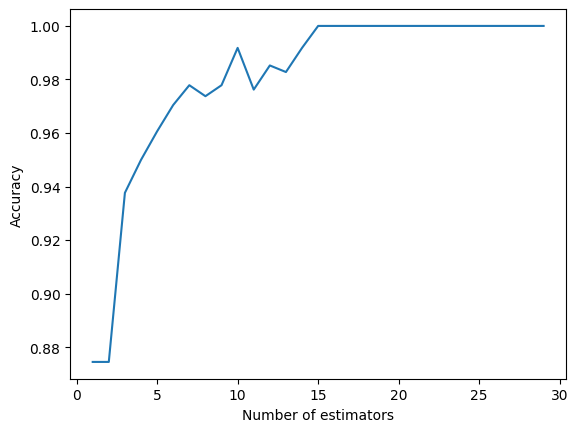

In [40]:
sns.lineplot(x=range(1,30),y=Ascore)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')

In [41]:
mod.fit(X,y)

RandomForestClassifier()

In [42]:
mod2.fit(X,y)

AdaBoostClassifier()

In [43]:
X.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [44]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,

In [45]:
dict1 = {'cap-shape_c':False, 'cap-shape_f':False, 'cap-shape_k':False, 'cap-shape_s':False,
       'cap-shape_x':False, 'cap-surface_g':False, 'cap-surface_s':False, 'cap-surface_y':False,
       'cap-color_c':False, 'cap-color_e':False, 'cap-color_g':False, 'cap-color_n':False,
       'cap-color_p':False, 'cap-color_r':False, 'cap-color_u':False, 'cap-color_w':False,
       'cap-color_y':False, 'bruises_t':False, 'odor_c':False, 'odor_f':False, 'odor_l':False, 'odor_m':False,
       'odor_n':False, 'odor_p':False, 'odor_s':False, 'odor_y':False, 'gill-attachment_f':False,
       'gill-spacing_w':False, 'gill-size_n':False, 'gill-color_e':False, 'gill-color_g':False,
       'gill-color_h':False, 'gill-color_k':False, 'gill-color_n':False, 'gill-color_o':False,
       'gill-color_p':False, 'gill-color_r':False, 'gill-color_u':False, 'gill-color_w':False,
       'gill-color_y':False, 'stalk-shape_t':False, 'stalk-root_b':False, 'stalk-root_c':False,
       'stalk-root_e':False, 'stalk-root_r':False, 'stalk-surface-above-ring_k':False,
       'stalk-surface-above-ring_s':False, 'stalk-surface-above-ring_y':False,
       'stalk-surface-below-ring_k':False, 'stalk-surface-below-ring_s':False,
       'stalk-surface-below-ring_y':False, 'stalk-color-above-ring_c':False,
       'stalk-color-above-ring_e':False, 'stalk-color-above-ring_g':False,
       'stalk-color-above-ring_n':False, 'stalk-color-above-ring_o':False,
       'stalk-color-above-ring_p':False, 'stalk-color-above-ring_w':False,
       'stalk-color-above-ring_y':False, 'stalk-color-below-ring_c':False,
       'stalk-color-below-ring_e':False, 'stalk-color-below-ring_g':False,
       'stalk-color-below-ring_n':False, 'stalk-color-below-ring_o':False,
       'stalk-color-below-ring_p':False, 'stalk-color-below-ring_w':False,
       'stalk-color-below-ring_y':False, 'veil-color_o':False, 'veil-color_w':False,
       'veil-color_y':False, 'ring-number_o':False, 'ring-number_t':False, 'ring-type_f':False,
       'ring-type_l':False, 'ring-type_n':False, 'ring-type_p':False, 'spore-print-color_h':False,
       'spore-print-color_k':False, 'spore-print-color_n':False, 'spore-print-color_o':False,
       'spore-print-color_r':False, 'spore-print-color_u':False, 'spore-print-color_w':False,
       'spore-print-color_y':False, 'population_c':False, 'population_n':False, 'population_s':False,
       'population_v':False, 'population_y':False, 'habitat_g':False, 'habitat_l':False, 'habitat_m':False,
       'habitat_p':False, 'habitat_u':False, 'habitat_w':False}
Old = pd.DataFrame([dict1])
Old

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
dict2 = {'cap-shape_c':False, 'cap-shape_f':False, 'cap-shape_k':False, 'cap-shape_s':False,
       'cap-shape_x':False, 'cap-surface_g':False, 'cap-surface_s':False, 'cap-surface_y':False,
       'cap-color_c':False, 'cap-color_e':False, 'cap-color_g':False, 'cap-color_n':False,
       'cap-color_p':False, 'cap-color_r':False, 'cap-color_u':False, 'cap-color_w':False,
       'cap-color_y':False, 'bruises_t':False, 'odor_c':False, 'odor_f':False, 'odor_l':False, 'odor_m':False,
       'odor_n':False, 'odor_p':False, 'odor_s':False, 'odor_y':False, 'gill-attachment_f':False,
       'gill-spacing_w':False, 'gill-size_n':False, 'gill-color_e':False, 'gill-color_g':False,
       'gill-color_h':False, 'gill-color_k':False, 'gill-color_n':False, 'gill-color_o':False,
       'gill-color_p':False, 'gill-color_r':False, 'gill-color_u':False, 'gill-color_w':False,
       'gill-color_y':False, 'stalk-shape_t':False, 'stalk-root_b':False, 'stalk-root_c':False,
       'stalk-root_e':False, 'stalk-root_r':False, 'stalk-surface-above-ring_k':False,
       'stalk-surface-above-ring_s':False, 'stalk-surface-above-ring_y':False,
       'stalk-surface-below-ring_k':False, 'stalk-surface-below-ring_s':False,
       'stalk-surface-below-ring_y':False, 'stalk-color-above-ring_c':False,
       'stalk-color-above-ring_e':False, 'stalk-color-above-ring_g':False,
       'stalk-color-above-ring_n':False, 'stalk-color-above-ring_o':False,
       'stalk-color-above-ring_p':False, 'stalk-color-above-ring_w':False,
       'stalk-color-above-ring_y':False, 'stalk-color-below-ring_c':False,
       'stalk-color-below-ring_e':False, 'stalk-color-below-ring_g':False,
       'stalk-color-below-ring_n':False, 'stalk-color-below-ring_o':False,
       'stalk-color-below-ring_p':False, 'stalk-color-below-ring_w':False,
       'stalk-color-below-ring_y':False, 'veil-color_o':False, 'veil-color_w':False,
       'veil-color_y':False, 'ring-number_o':False, 'ring-number_t':False, 'ring-type_f':False,
       'ring-type_l':False, 'ring-type_n':False, 'ring-type_p':False, 'spore-print-color_h':False,
       'spore-print-color_k':False, 'spore-print-color_n':False, 'spore-print-color_o':False,
       'spore-print-color_r':False, 'spore-print-color_u':False, 'spore-print-color_w':False,
       'spore-print-color_y':False, 'population_c':False, 'population_n':False, 'population_s':False,
       'population_v':False, 'population_y':False, 'habitat_g':False, 'habitat_l':False, 'habitat_m':False,
       'habitat_p':False, 'habitat_u':False, 'habitat_w':False}
New = pd.DataFrame([dict2])

In [47]:
final = Old | New
final

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
mod.predict(final)

array(['p'], dtype=object)

In [49]:
mod2.predict(final)

array(['e'], dtype=object)

In [50]:
mod.feature_importances_

array([9.87031126e-05, 1.86381238e-03, 1.09958518e-03, 8.17067747e-04,
       1.05799255e-03, 3.32782412e-04, 7.59634864e-03, 3.32792640e-03,
       7.62186537e-04, 3.04283192e-04, 2.02404926e-03, 1.24563466e-03,
       2.49343446e-03, 3.64951074e-04, 3.19994898e-04, 5.02576561e-03,
       6.97702051e-03, 4.24667165e-02, 1.46570431e-02, 9.50126171e-02,
       4.47698963e-03, 5.99493282e-04, 1.07815961e-01, 2.27886192e-02,
       1.11082428e-02, 9.24109990e-03, 1.23642319e-03, 2.62355541e-02,
       9.24541834e-02, 3.07556098e-05, 6.97271015e-04, 1.47182489e-03,
       1.25377069e-03, 2.86271482e-03, 3.03894487e-07, 4.26595780e-04,
       1.64953295e-03, 8.01263936e-04, 4.78941217e-03, 3.21833661e-04,
       1.45620644e-02, 1.63305836e-02, 7.72977399e-03, 2.02469684e-02,
       1.93013653e-03, 4.81535439e-02, 2.23819607e-02, 1.57214989e-04,
       6.20875630e-02, 7.97857684e-03, 3.49437779e-03, 7.35398689e-04,
       3.87646252e-04, 1.51115507e-03, 5.77336805e-05, 8.62768485e-04,
      

In [51]:
feats = pd.DataFrame(index=X.columns,data=mod.feature_importances_,columns=['Importance'])

In [52]:
feats

,Importance
cap-shape_c,0.000099
cap-shape_f,0.001864
cap-shape_k,0.001100
cap-shape_s,0.000817
cap-shape_x,0.001058
...,...
habitat_l,0.002303
habitat_m,0.002765
habitat_p,0.008938
habitat_u,0.008023


<Axes: >

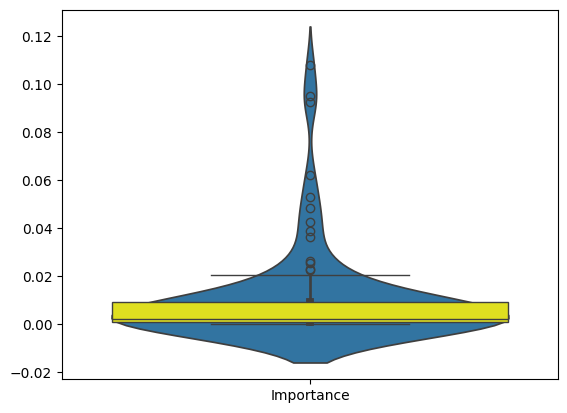

In [53]:
sns.violinplot(feats)
sns.boxplot(feats,color="yellow")

In [54]:
imp_feats = feats[feats['Importance']>0.01]

In [55]:
imp_feats

,Importance
bruises_t,0.042467
odor_c,0.014657
odor_f,0.095013
odor_n,0.107816
odor_p,0.022789
odor_s,0.011108
gill-spacing_w,0.026236
gill-size_n,0.092454
stalk-shape_t,0.014562
stalk-root_b,0.016331


In [56]:
feats2 = pd.DataFrame(index=X.columns,data=mod2.feature_importances_,columns=['Importance2'])

In [57]:
feats2

,Importance2
cap-shape_c,0.00
cap-shape_f,0.00
cap-shape_k,0.00
cap-shape_s,0.00
cap-shape_x,0.00
...,...
habitat_l,0.02
habitat_m,0.00
habitat_p,0.00
habitat_u,0.00


<Axes: >

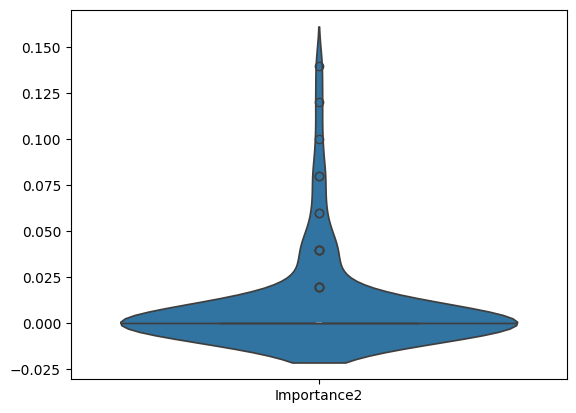

In [58]:
sns.violinplot(feats2)
sns.boxplot(feats2,color="yellow")

In [59]:
imp_feats2 = feats2[feats2['Importance2']>0]

In [60]:
imp_feats2

,Importance2
cap-color_w,0.02
odor_c,0.04
odor_f,0.04
odor_n,0.06
odor_p,0.02
gill-spacing_w,0.10
gill-size_n,0.12
stalk-shape_t,0.04
stalk-surface-above-ring_k,0.04
stalk-surface-below-ring_y,0.04


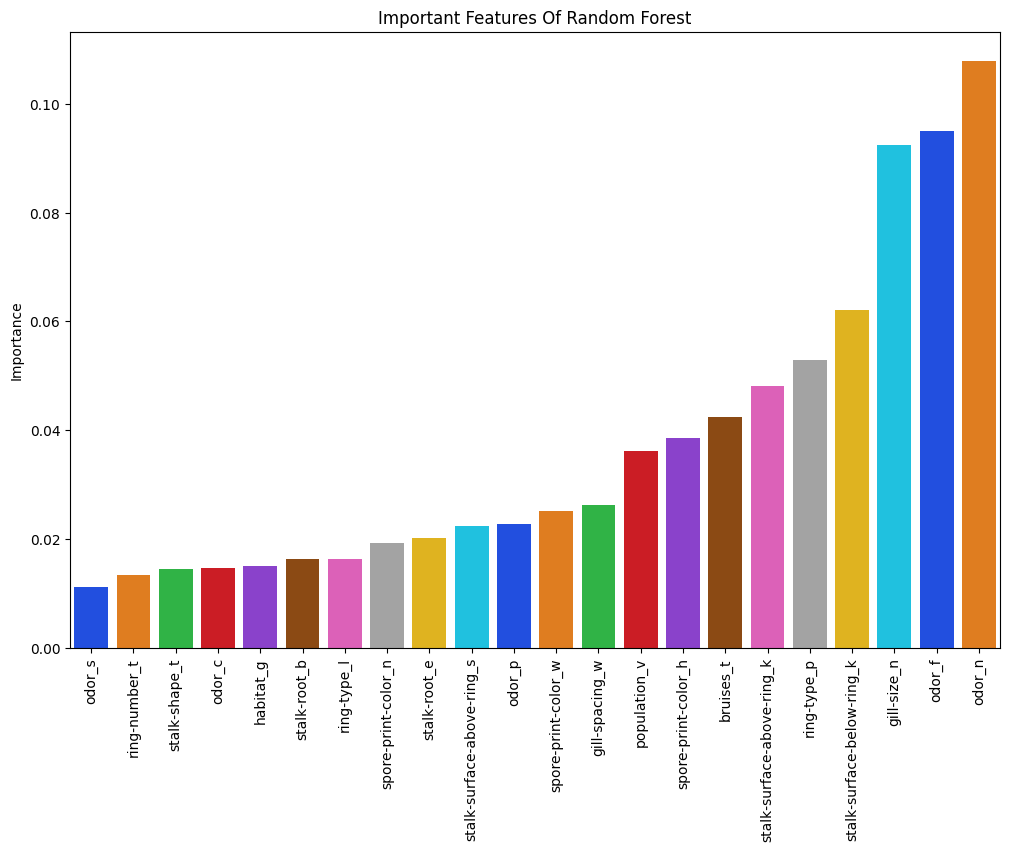

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(imp_feats['Importance'].sort_values(),palette='bright')
plt.title('Important Features Of Random Forest')
plt.xticks(rotation=90);

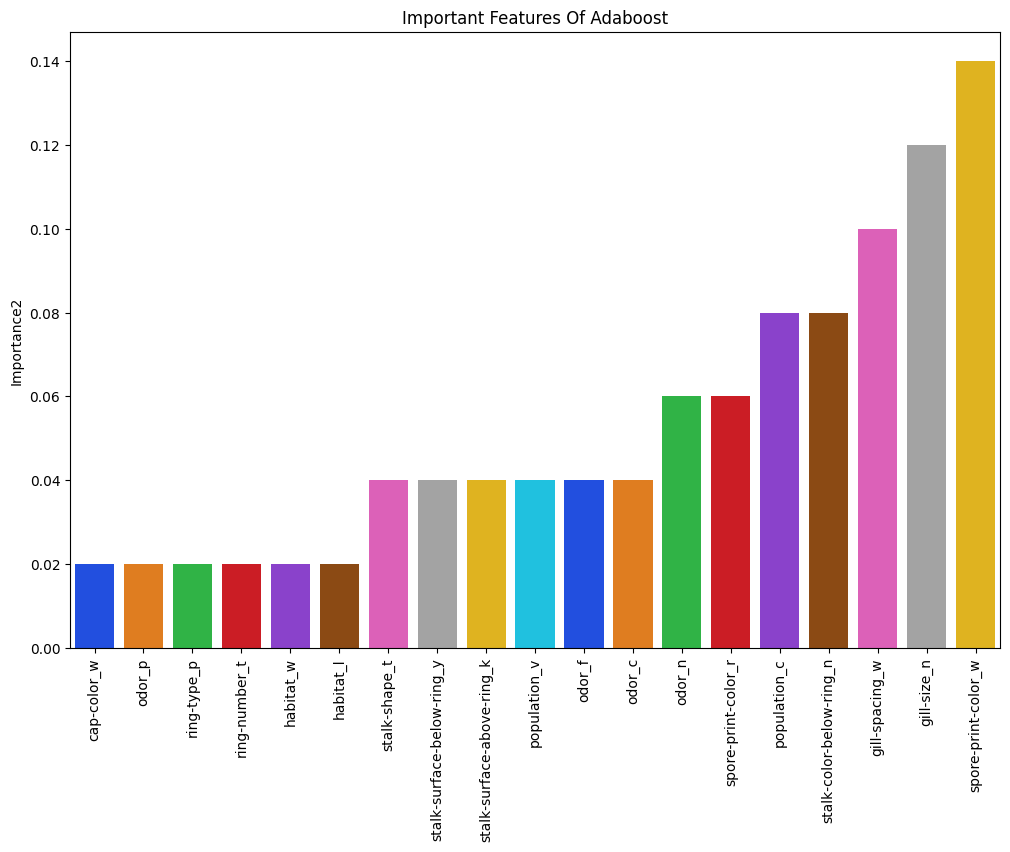

In [62]:
plt.figure(figsize=(12,8))
sns.barplot(imp_feats2['Importance2'].sort_values(),palette='bright')
plt.title('Important Features Of Adaboost')
plt.xticks(rotation=90);

In [63]:
import joblib
joblib.dump(mod,"RandomForest")

['RandomForest']

In [64]:
import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np

features = [
    'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 
    'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_c', 'cap-color_e', 
    'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 
    'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 
    'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f', 
    'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g', 'gill-color_h', 
    'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 
    'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 
    'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k', 
    'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k', 
    'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_c', 
    'stalk-color-above-ring_e', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 
    'stalk-color-above-ring_o', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 
    'stalk-color-above-ring_y', 'stalk-color-below-ring_c', 'stalk-color-below-ring_e', 
    'stalk-color-below-ring_g', 'stalk-color-below-ring_n', 'stalk-color-below-ring_o', 
    'stalk-color-below-ring_p', 'stalk-color-below-ring_w', 'stalk-color-below-ring_y', 
    'veil-color_o', 'veil-color_w', 'veil-color_y', 'ring-number_o', 'ring-number_t', 
    'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p', 'spore-print-color_h', 
    'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o', 
    'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w', 
    'spore-print-color_y', 'population_c', 'population_n', 'population_s', 
    'population_v', 'population_y', 'habitat_g', 'habitat_l', 'habitat_m', 
    'habitat_p', 'habitat_u', 'habitat_w'
]

model = joblib.load('RandomForest')  

def predict():
    # Gather the selected features into an array
    selected_features = [var.get() for var in feature_vars.values()]
    
    # Convert to a NumPy array for prediction
    input_data = np.array(selected_features).reshape(1, -1)
    
    # Make a prediction
    try:
        prediction = model.predict(input_data)[0]
        if prediction == 'p':
            result = "The mushroom is poisonous!"
        else:
            result = "The mushroom is edible!"
        messagebox.showinfo("Prediction", result)
    except Exception as e:
        messagebox.showerror("Error", f"Prediction failed: {e}")

# Initialize the main window
root = tk.Tk()
root.title("Mushroom Classifier")

# Create a scrollbar and canvas for the features
frame = ttk.Frame(root)
frame.pack(fill="both", expand=True, padx=10, pady=10)

canvas = tk.Canvas(frame)
scrollbar = ttk.Scrollbar(frame, orient="vertical", command=canvas.yview)
scrollable_frame = ttk.Frame(canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")

# Create a dictionary to hold the BooleanVars for each feature
feature_vars = {}

# Add checkboxes for each feature
for feature in features:
    var = tk.BooleanVar(value=False)
    feature_vars[feature] = var
    chk = ttk.Checkbutton(scrollable_frame, text=feature, variable=var)
    chk.pack(anchor="w", padx=5, pady=2)

# Add a predict button
predict_btn = ttk.Button(root, text="Predict", command=predict)
predict_btn.pack(pady=10)

root.mainloop()


C:\Users\alok1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
